In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
RUL = pd.read_csv('data/RUL.csv')
col_names = ['s12', 's7', 's21', 's20', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']


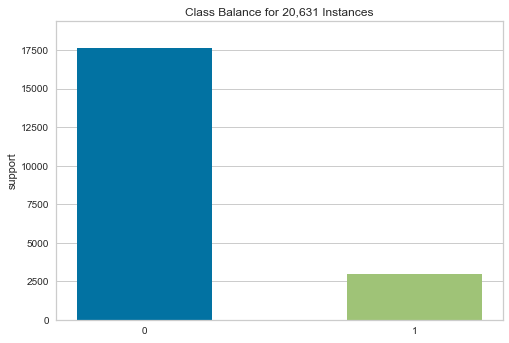

<AxesSubplot:title={'center':'Class Balance for 20,631 Instances'}, ylabel='support'>

In [3]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y_train=df_train['label_bnc'])
visualizer.poof()

In [4]:
df = df_train[df_train.label_bnc ==1]
df = df.reset_index()
df 

,index,id,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,162,1,163,0.0003,-0.0004,100.0,518.67,642.85,1600.54,1421.09,...,8124.06,8.5129,0.03,393,2388,100.0,38.65,23.1419,29,1
1,163,1,164,0.0005,-0.0002,100.0,518.67,643.17,1598.96,1416.76,...,8124.63,8.4803,0.03,394,2388,100.0,38.62,23.1761,28,1
2,164,1,165,0.0010,0.0004,100.0,518.67,642.76,1597.03,1408.09,...,8126.53,8.4922,0.03,393,2388,100.0,38.59,23.2129,27,1
3,165,1,166,-0.0022,-0.0003,100.0,518.67,643.34,1596.72,1422.37,...,8119.14,8.4663,0.03,395,2388,100.0,38.62,23.1450,26,1
4,166,1,167,0.0012,0.0003,100.0,518.67,643.02,1593.83,1414.72,...,8122.41,8.4632,0.03,394,2388,100.0,38.77,23.3011,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1
2996,20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1
2997,20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1
2998,20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1


In [5]:
df1 = df_test[df_test.label_bnc ==1]
df1 = df1.reset_index()
df1

,index,id,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,17,18,133,0.0007,0.0001,100.0,518.67,643.00,1600.45,1419.18,...,8136.80,8.4418,0.03,395,2388,100.0,38.71,23.2637,28,1
1,19,20,184,-0.0006,-0.0004,100.0,518.67,643.75,1595.12,1419.60,...,8138.86,8.4690,0.03,395,2388,100.0,38.35,23.0242,16,1
2,23,24,186,-0.0004,0.0002,100.0,518.67,643.28,1593.82,1415.13,...,8211.21,8.4785,0.03,393,2388,100.0,38.72,23.2093,20,1
3,30,31,196,-0.0005,0.0001,100.0,518.67,643.31,1598.19,1420.66,...,8157.84,8.5015,0.03,395,2388,100.0,38.53,23.1105,8,1
4,33,34,203,-0.0011,-0.0001,100.0,518.67,643.74,1600.38,1427.49,...,8122.11,8.5158,0.03,397,2388,100.0,38.62,23.0641,7,1
5,34,35,198,-0.0047,-0.0003,100.0,518.67,643.40,1602.02,1428.42,...,8153.85,8.5141,0.03,395,2388,100.0,38.63,23.1161,11,1
6,35,36,126,-0.0018,-0.0002,100.0,518.67,642.94,1599.19,1418.98,...,8136.96,8.5259,0.03,394,2388,100.0,38.54,23.1534,19,1
7,36,37,121,-0.0006,0.0002,100.0,518.67,643.34,1593.15,1413.38,...,8119.07,8.4944,0.03,394,2388,100.0,38.76,23.2145,21,1
8,39,40,133,-0.0036,-0.0005,100.0,518.67,643.20,1603.15,1420.48,...,8143.07,8.4700,0.03,396,2388,100.0,38.58,23.0906,28,1
9,40,41,123,-0.0018,0.0001,100.0,518.67,642.54,1594.24,1416.76,...,8115.82,8.4533,0.03,395,2388,100.0,38.84,23.1718,18,1


In [12]:
X_train =df[col_names]
y_train = df['ttf']
X_test = df1[col_names]
y_test = df1['ttf']

In [13]:
def get_regression_metrics(model, actual, predicted):
   
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [14]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.716, R^2 test: 0.624


,Linear Regression
Root Mean Squared Error,4.474071
Mean Absolute Error,3.431046
R^2,0.624029
Explained Variance,0.640277


In [15]:
y_test_predict

array([29.27008334, 16.24130741, 24.99751247, 12.68230281,  9.08652283,
        9.20643209, 18.13673725, 28.04373615, 20.04695742, 29.99043881,
       15.85221071, 14.14090426, 27.63659013, 26.61749199, 15.66006872,
       24.10278964, 25.18464525, 16.57196584, 13.86763803, 11.32504741,
        9.14269291, 10.06232623, 23.2858195 , 15.82908089, 19.27081521])

In [16]:
dtrg = DecisionTreeRegressor(max_depth=7, random_state=123)
dtrg.fit(X_train, y_train)

y_test_predict = dtrg.predict(X_test)
y_train_predict = dtrg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

dtrg_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)
dtrg_metrics

R^2 training: 0.766, R^2 test: 0.483


,Decision Tree Regression
Root Mean Squared Error,5.245422
Mean Absolute Error,4.235316
R^2,0.483215
Explained Variance,0.484342


In [17]:
rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted 

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.797, R^2 test: 0.609


,Random Forest Regression
Root Mean Squared Error,4.561918
Mean Absolute Error,3.815504
R^2,0.609120
Explained Variance,0.612688
